In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simulation Class

In [1]:
class Simulation:
    def __init__(self,dx=1,dt=0.02,B=0*5.42/(10**6),signal_lenght=0.05,veto_lenght=0.1,fluxmeno=0.00045,fluxpiu=0.00055, taumeno=0.163,taupiu=2.2,lunghezza_scintillatore=7,larghezza_scintillatore=15):
        self.signal=0
        self.signal_counter=0
        self.grid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Thetagrid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Phigrid=np.zeros([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.Bgrid=B*np.ones([int(lunghezza_scintillatore/dx),int(larghezza_scintillatore/dx)])
        self.taupiu=taupiu
        self.taumeno=taumeno
        self.dt=dt
        self.dx=dx
        self.p_arrivemeno=fluxmeno*dt*dx**2
        self.p_arrivepiu=fluxpiu*dt*dx**2
        self.p_decaymeno = 1 - np.exp(-self.dt / self.taumeno)
        self.p_decaypiu = 1 - np.exp(-self.dt / self.taupiu)
        self.signal_lenght=(signal_lenght/dt + 0.5)//1
        self.veto_lenght=(veto_lenght/dt +0.5 )//1
        self.g=1
        self.ariettacounter=0
        self.ariettastate=0
        self.ariettadead=(0.05/dt+0.5)//1
        self.ariettawait=0
        self.output=[]

    def grid_step(self):
        analogsignal=[False,False]
        tempgrid=np.copy(self.grid)
        maskarrmeno= (self.grid==0) & (np.random.rand(*self.grid.shape) < self.p_arrivemeno)
        maskarrpiu= (self.grid==0) & (np.random.rand(*self.grid.shape) < self.p_arrivepiu)
        maskdecaymeno= (self.grid==1) & (np.random.rand(*self.grid.shape) < self.p_decaymeno)
        maskdecaypiu= (self.grid==2) & (np.random.rand(*self.grid.shape) < self.p_decaypiu)
        
        self.grid[maskdecaymeno]=0
        self.grid[maskdecaypiu]=0

        if np.any(self.grid != tempgrid):
            
            decaygrid=tempgrid-self.grid
            if np.any(self.Phigrid[decaygrid==1]+np.random.rand(*self.Phigrid.shape)[decaygrid==1]*np.pi<=np.pi) or np.any(self.Phigrid[decaygrid==2]+np.random.rand(*self.Phigrid.shape)[decaygrid==2]*np.pi>=np.pi):
                analogsignal[0]=True
                
               

            if np.any(self.Phigrid[decaygrid==1]+np.random.rand(*self.Phigrid.shape)[decaygrid==1]*np.pi>=np.pi) or np.any(self.Phigrid[decaygrid==2]+np.random.rand(*self.Phigrid.shape)[decaygrid==2]*np.pi<=np.pi):
                analogsignal[1]=True
                


        tempgrid=np.copy(self.grid)

        self.grid[maskarrmeno]=1
        self.Thetagrid[maskarrmeno]=np.random.rand(*self.Thetagrid.shape)[maskarrmeno]*np.pi
        self.Phigrid[maskarrmeno]=np.random.rand(*self.Phigrid.shape)[maskarrmeno]*np.pi
        
        self.grid[maskarrpiu]=2
        self.Thetagrid[maskarrpiu]=np.random.rand(*self.Thetagrid.shape)[maskarrpiu]*np.pi
        self.Phigrid[maskarrpiu]=np.random.rand(*self.Phigrid.shape)[maskarrpiu]*np.pi+np.pi

        self.Phigrid[self.grid==1]=(self.Phigrid[self.grid==1]+self.Bgrid[self.grid==1]*self.dt*((1.6*10**(-19)*10**(-3))/(1.88*10**(-28))))%(2*np.pi)
        self.Phigrid[self.grid==2]=(self.Phigrid[self.grid==2]-self.Bgrid[self.grid==2]*self.dt*((1.6*10**(-19)*10**(-3))/(1.88*10**(-28))))%(2*np.pi)
        self.Phigrid[self.grid==0]=0

        if np.any(self.grid != tempgrid):
            analogsignal[0]=True
            
           


        
        return analogsignal

    def digital_signal_step(self,analogsignal):
        self.signal=False
        if (analogsignal[0]):
            self.signal_counter=self.signal_lenght
        if analogsignal[1]:
            self.signal_counter=-self.veto_lenght

        if (self.signal_counter>0):
            self.signal=True
            self.signal_counter=self.signal_counter-1

        if (self.signal_counter<0):
            self.signal=False
            self.signal_counter=self.signal_counter+1

        return self.signal, self.signal_counter
        

    def arietta(self,digitalsignal):
        if(digitalsignal):
            if self.ariettastate==0:
                self.ariettastate=1
                self.ariettawait=self.ariettadead
            if self.ariettastate==1:
                if(self.ariettawait==0):
                    self.ariettastate=2
            if self.ariettastate==2:
                self.ariettastate=0
                self.output.append(np.copy(self.ariettacounter*self.dt))
                self.ariettacounter=0

        if self.ariettastate==1:
            self.ariettacounter=self.ariettacounter+1
            if not(self.ariettawait==0):
                self.ariettawait=self.ariettawait-1


        if self.ariettacounter*self.dt>15:
            self.ariettacounter=0
            self.ariettastate=0
        
    def time_step(self):
        analogsignal = self.grid_step()
        digital, temp = self.digital_signal_step(analogsignal)
        self.arietta(digital)
        



Siamo al  0.0 %
Siamo al  0.33333333333333337 %
Siamo al  0.6666666666666667 %
Siamo al  1.0 %
Siamo al  1.3333333333333335 %
Siamo al  1.6666666666666667 %
Siamo al  2.0 %
Siamo al  2.3333333333333335 %
Siamo al  2.666666666666667 %
Siamo al  3.0 %
Siamo al  3.3333333333333335 %
Siamo al  3.6666666666666665 %
Siamo al  4.0 %
Siamo al  4.333333333333334 %
Siamo al  4.666666666666667 %
Siamo al  5.0 %
Siamo al  5.333333333333334 %
Siamo al  5.666666666666666 %
Siamo al  6.0 %
Siamo al  6.333333333333334 %
Siamo al  6.666666666666667 %
Siamo al  7.000000000000001 %
Siamo al  7.333333333333333 %
Siamo al  7.666666666666666 %
Siamo al  8.0 %
Siamo al  8.333333333333332 %
Siamo al  8.666666666666668 %
Siamo al  9.0 %
Siamo al  9.333333333333334 %
Siamo al  9.666666666666666 %
Siamo al  10.0 %
Siamo al  10.333333333333334 %
Siamo al  10.666666666666668 %
Siamo al  11.0 %
Siamo al  11.333333333333332 %
Siamo al  11.666666666666666 %
Siamo al  12.0 %
Siamo al  12.333333333333334 %
Siamo al  12

(array([4165., 1582.,  941.,  637.,  504.,  405.,  303.,  256.,  202.,
         186.]),
 array([ 0.06 ,  1.554,  3.048,  4.542,  6.036,  7.53 ,  9.024, 10.518,
        12.012, 13.506, 15.   ]),
 <BarContainer object of 10 artists>)

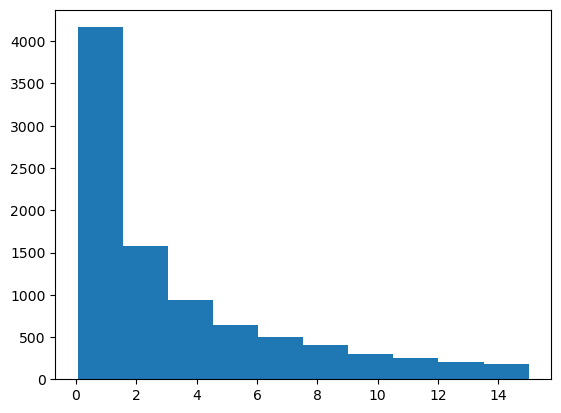

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib.gridspec as gridspec


Sistema = Simulation()

matrices = []
matrices2 = []
coinc = []
veto = []
digital = []
counter = []
num_frames = 50

number=3000000
for i in range(number):
    analogsignal = Sistema.grid_step()
    matrices2.append(np.copy(Sistema.grid)) 
    matrices.append(np.copy(Sistema.Phigrid)) 
    coinc.append(1 if analogsignal[0] else 0)
    veto.append(1 if analogsignal[1] else 0)
    digitalsignal = Sistema.digital_signal_step(analogsignal)
    digital.append(1 if digitalsignal[0] else 0)
    counter.append(digitalsignal[1])
    Sistema.arietta(digitalsignal[0])
    if(i%10000==0):
        print("Siamo al ",(i/number)*100,"%")

print(Sistema.output)
plt.hist(Sistema.output)




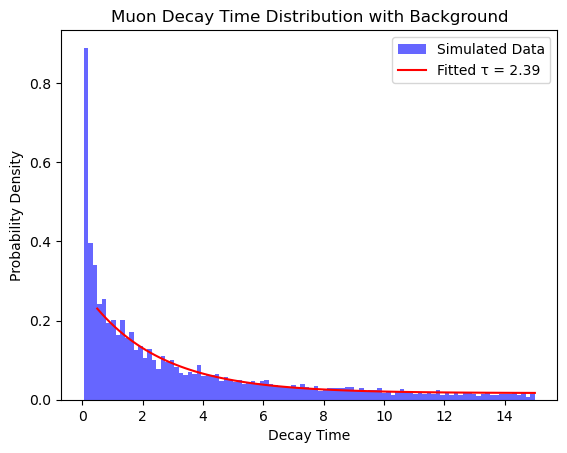

Fitted mean lifetime: 2.39 (expected: 2.2)
Fitted background level: 0.0167


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data=np.load("FondoMontecarlo.npy")
# Define the exponential decay function with a flat background
def exp_decay_with_background(t, tau, A, C):
    return A * np.exp(-t / tau) + C

# Load decay times from Sistema.output
data = np.array(data)

# Create histogram
counts, bin_edges = np.histogram(data, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins

# Filter data for fitting (only use points where t > 0.5)
mask = bin_centers > 1
filtered_bin_centers = bin_centers[mask]
filtered_counts = counts[mask]

# Fit histogram data with exponential decay + background
popt, pcov = curve_fit(exp_decay_with_background, filtered_bin_centers, filtered_counts, 
                       p0=[2.2, max(filtered_counts), min(filtered_counts)])

# Extract fitted parameters
tau_fitted, A_fitted, C_fitted = popt

# Plot histogram
plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label="Simulated Data")

# Plot fitted curve (only for t > 0.5)
t_fit = np.linspace(0.5, max(data), 100)
plt.plot(t_fit, exp_decay_with_background(t_fit, *popt), 'r-', label=f"Fitted τ = {tau_fitted:.2f}")


# Labels and legend
plt.xlabel("Decay Time")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Muon Decay Time Distribution with Background")

plt.show()

# Print fitted values
print(f"Fitted mean lifetime: {tau_fitted:.2f} (expected: 2.2)")
print(f"Fitted background level: {C_fitted:.4f}")


Frame 0
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
Frame 13
Frame 14
Frame 15
Frame 16
Frame 17
Frame 18
Frame 19
Frame 20
Frame 21
Frame 22
Frame 23
Frame 24
Frame 25
Frame 26
Frame 27
Frame 28
Frame 29
Frame 30


KeyboardInterrupt: 

Frame 0


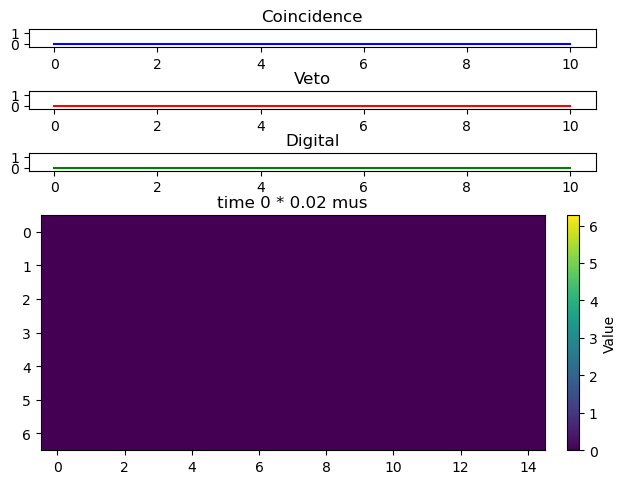

In [4]:

# ---- Create Figure ----
fig, axes = plt.subplot_mosaic(
    [[0], [1], [2], [3]],
    gridspec_kw={"height_ratios": [0.3, 0.3, 0.3, 4]}
)
plt.tight_layout()

# ---- Initialize Plots ----
i = 15
(coin_line,) = axes[0].plot(coinc[i:i+11], color="blue")
(vet_line,) = axes[1].plot(veto[i:i+11], color="red")
(dig_line,) = axes[2].plot(digital[i:i+11], color="green")

axes[0].set_title("Coincidence")
axes[1].set_title("Veto")
axes[2].set_title("Digital")
# Access axes using their keys (0, 1, 2) since they are a dictionary
for ax in [axes[0], axes[1], axes[2]]:
    ax.set_ylim(-0.3, 1.3)

# ---- Initialize Image Plot ----
cax = axes[3].imshow(matrices[i], cmap="viridis", interpolation="none", vmin=0, vmax=6.28)

# ---- Add Colorbar ----
cbar = fig.colorbar(cax, ax=axes[3], orientation="vertical", fraction=0.05, pad=0.04)
cbar.set_label("Value")

# ---- Animation Update Function ----
def update(a):
    frame=a
    # Ensure frame+10 does not exceed num_frames
    frame_idx = min(frame + 10, num_frames - 1)
    
    cax.set_array(matrices[frame+10])  # Update matrix
    coin_line.set_ydata(coinc[frame:frame+11])  # Update line plots
    vet_line.set_ydata(veto[frame:frame+11])
    dig_line.set_ydata(digital[frame:frame+11])
    
    axes[3].set_title(f"time {frame} * {Sistema.dt} mus")
    print("Frame",frame)
    return [cax, coin_line, vet_line, dig_line]

# ---- Create Animation ----
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=False)

# ---- Save Animation ----
ani.save("matrix_animation.gif", writer=animation.PillowWriter(fps=10))

plt.show()


In [ ]:
a=np.ones([int(3.5),3])
print(a)

b=np.random.rand(3,3)
print(b)
mask= b>0.5
print(a[mask])
a[mask]=(np.random.rand(3,3)[mask]*2*np.pi)%(2*np.pi)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.7524274  0.13110844 0.18736013]
 [0.297121   0.30822083 0.32401719]
 [0.22821537 0.3762465  0.00824945]]
[1.]
[[5.60113872 1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]
